## Descripció
Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

# Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. També adjunt trobaràs una descripció de les diferents variables del dataset.

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000
11. PTRATIO - pupil-teacher ratio by town  
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. LSTAT - % lower status of the population  
14. MEDV - Median value of owner-occupied homes in $1000's --> **Considerem com a variable dependent "y"**

In [372]:
import numpy as np
import pandas as pd

In [373]:
Titulos=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('C:\\RAUL\\NISSAN\\GENERAL\\USB\\FORMACION\\BootCamp - Data Scientist_Analist\\IT Academy Cibernarium - Data Science\\Data Science Itinerario\\5.- Introducción al Test de Hipótesis y al Machine Learning\\Entrega\\housing data.csv', header=None, names=Titulos)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [374]:
housing.shape

(506, 14)

In [375]:
housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [376]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [377]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Separem les columnes independets de la comlumna dependent o target (MEDV)
X = housing.drop(['MEDV'],axis=1).values
y = housing['MEDV'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [378]:
# Reagrupem X+y en 2 dataframe les dades de Train i Test per poder estudiar-les per separat
arr_housing_train=np.column_stack((X_train, y_train))
df_housing_train=pd.DataFrame(arr_housing_train, columns=Titulos)

arr_housing_test=np.column_stack((X_test, y_test))
df_housing_test=pd.DataFrame(arr_housing_test, columns=Titulos)

In [379]:
print(df_housing_train.shape, df_housing_test.shape)

(354, 14) (152, 14)


In [380]:
df_housing_train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.36,11.81,11.08,0.06,0.56,6.31,68.99,3.76,9.35,401.78,18.47,360.60,12.44,22.75
std,8.35,23.65,6.99,0.25,0.12,0.70,28.04,2.07,8.67,170.59,2.22,85.62,7.08,9.22
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.17,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.07,0.00,4.95,0.00,0.45,5.90,45.18,2.11,4.00,276.00,17.40,376.06,6.74,17.32
50%,0.26,0.00,8.56,0.00,0.54,6.22,79.45,3.22,5.00,311.00,19.10,391.60,11.16,21.40
75%,3.10,20.00,18.10,0.00,0.63,6.65,93.75,5.08,24.00,666.00,20.20,395.69,16.72,25.18
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,36.98,50.00


In [381]:
df_housing_test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,4.21,10.33,11.27,0.08,0.55,6.23,67.60,3.87,10.01,423.27,18.41,347.53,13.15,22.04
std,9.15,22.58,6.56,0.27,0.12,0.70,28.47,2.20,8.80,163.21,2.03,103.03,7.28,9.16
min,0.01,0.00,0.74,0.00,0.39,3.86,6.00,1.13,1.00,188.00,12.60,2.60,1.92,5.60
25%,0.09,0.00,5.86,0.00,0.45,5.88,44.40,2.03,4.00,303.00,16.98,370.83,7.78,16.75
50%,0.23,0.00,9.90,0.00,0.52,6.16,74.70,3.14,5.00,384.00,18.70,390.91,12.00,20.80
75%,4.95,0.00,18.10,0.00,0.62,6.51,95.50,5.49,24.00,666.00,20.20,396.90,17.28,24.42
max,73.53,95.00,27.74,1.00,0.87,8.72,100.00,10.71,24.00,711.00,21.20,396.90,37.97,50.00


In [382]:
df_housing_train.nunique()

CRIM       353
ZN          26
INDUS       71
CHAS         2
NOX         80
RM         325
AGE        271
DIS        311
RAD          9
TAX         61
PTRATIO     43
B          259
LSTAT      326
MEDV       201
dtype: int64

In [383]:
df_housing_test.nunique()

CRIM       152
ZN          19
INDUS       50
CHAS         2
NOX         64
RM         148
AGE        124
DIS        142
RAD          9
TAX         45
PTRATIO     34
B          107
LSTAT      150
MEDV       109
dtype: int64

Text(0.5, 1.0, 'Matriu de Correl.lació de les dades de Test')

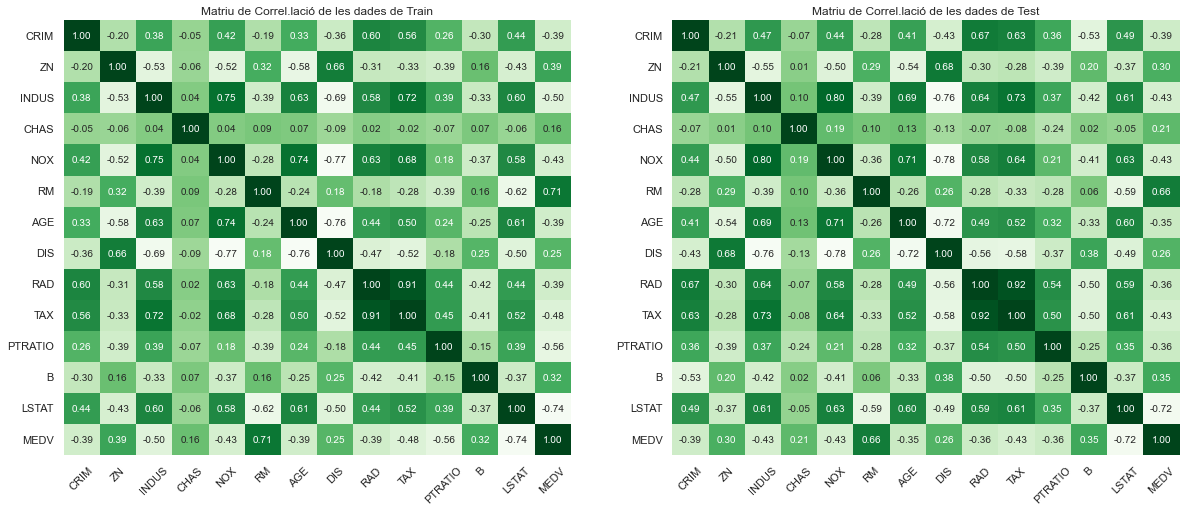

In [384]:
corr_train = df_housing_train.corr().round(4)
corr_test = df_housing_test.corr().round(4)

f, axes = plt.subplots(1, 2, figsize=(20, 8))

ax0=sns.heatmap(corr_train, fmt='.2f', annot=True, cbar=False, annot_kws={'size':10}, cmap='Greens', ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_yticklabels(ax0.get_yticklabels(),rotation=0)
ax0.set_title("Matriu de Correl.lació de les dades de Train")

ax1=sns.heatmap(corr_test, fmt='.2f', annot=True, cbar=False,annot_kws={'size':10}, cmap='Greens', ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_yticklabels(ax1.get_yticklabels(),rotation=0)
ax1.set_title("Matriu de Correl.lació de les dades de Test")


La correl.lació més forta correspon als camps RAD i TAX tant al Training com al Test,
RM i LSTAT ténen una correl.lació més gran de 0.69 amb MEDV, el que indica que poden ser bons predictors.

Text(0.5, 1.0, 'Gràfic de dispersió LSTAT vs MEDV(dades de Test)')

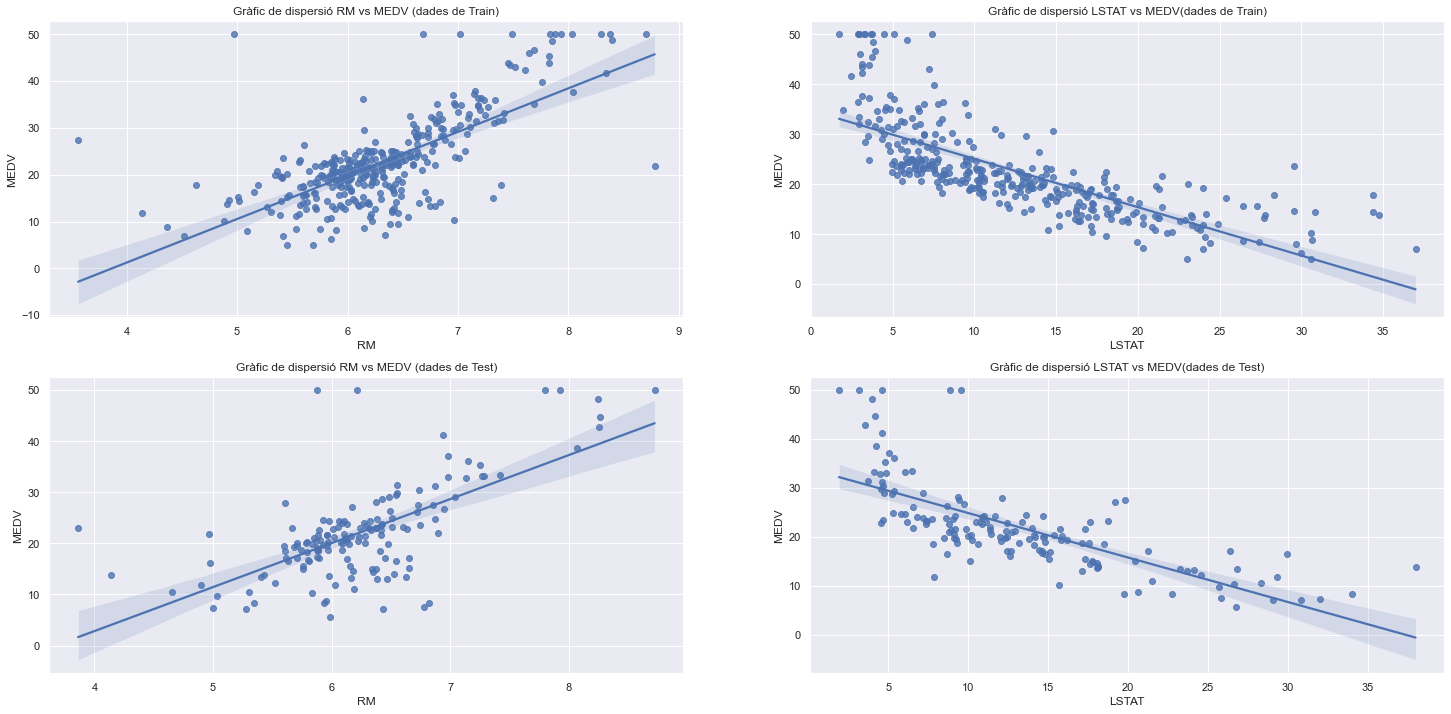

In [385]:
f, axes2 = plt.subplots(2, 2, figsize=(25, 12))

ax2=sns.regplot(data=df_housing_train, x="RM", y="MEDV", ax=axes2[0,0])
ax2.set_title("Gràfic de dispersió RM vs MEDV (dades de Train)")

ax3=sns.regplot(data=df_housing_train, x="LSTAT", y="MEDV", ax=axes2[0,1])
ax3.set_title("Gràfic de dispersió LSTAT vs MEDV(dades de Train)")

ax4=sns.regplot(data=df_housing_test, x="RM", y="MEDV", ax=axes2[1,0])
ax4.set_title("Gràfic de dispersió RM vs MEDV (dades de Test)")

ax5=sns.regplot(data=df_housing_test, x="LSTAT", y="MEDV", ax=axes2[1,1])
ax5.set_title("Gràfic de dispersió LSTAT vs MEDV(dades de Test)")

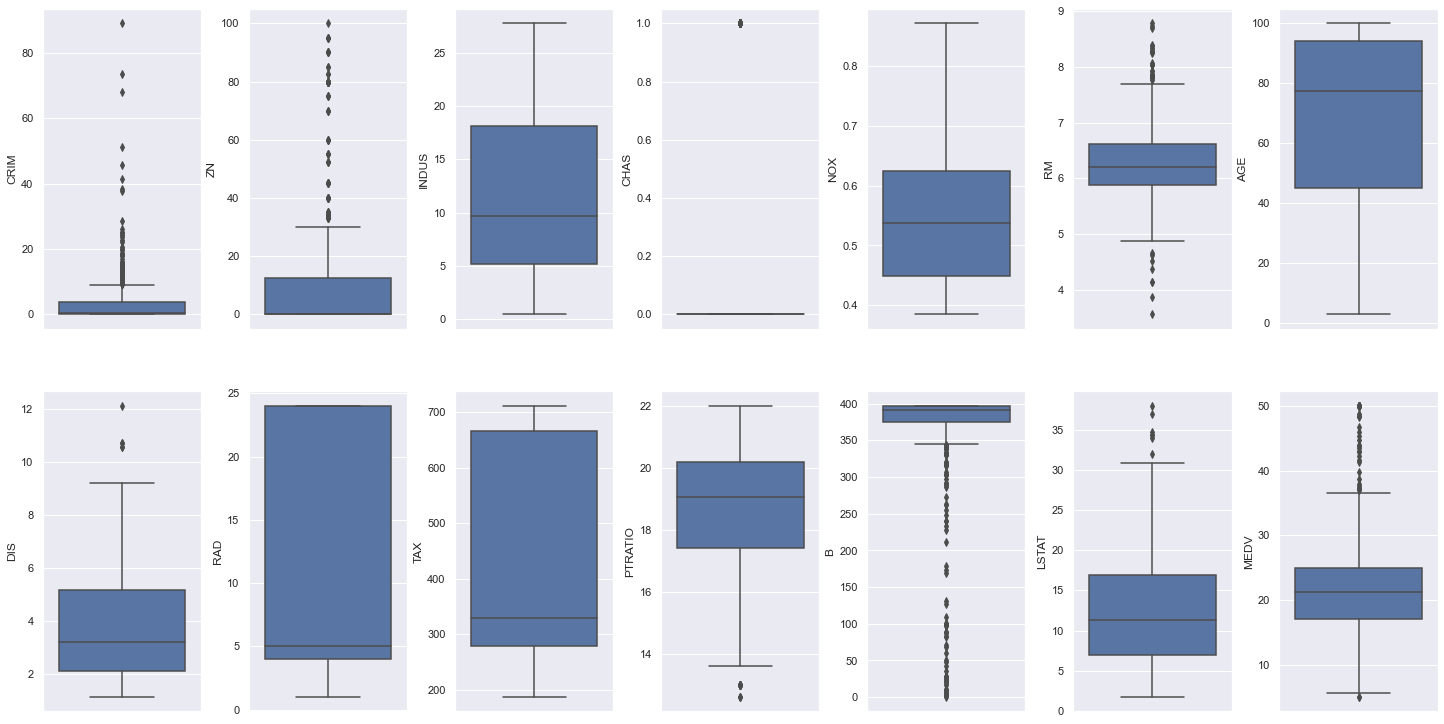

In [386]:
# Fem gràfic de Boxplot de tots els camps del dataframe de train
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_housing_train.items():
    sns.boxplot(y=k, data=housing, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

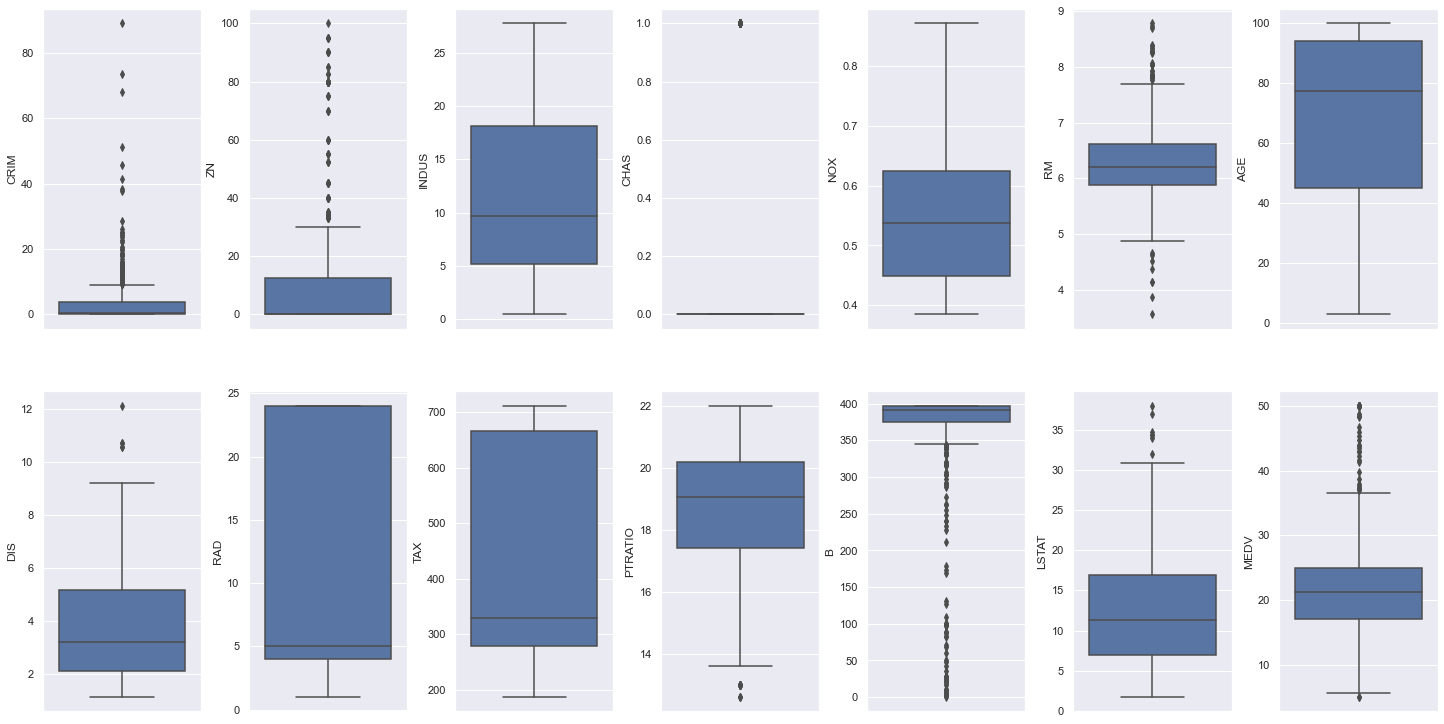

In [387]:
# Fem gràfic de Boxplot de tots els camps del dataframe de test
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_housing_test.items():
    sns.boxplot(y=k, data=housing, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Després de fer els Boxplots podem veure que diversos camps ténen molts outliers, per tant un escalador adient podria ser el QuantileTransformer per tal de passar els camps a una distribució normal.

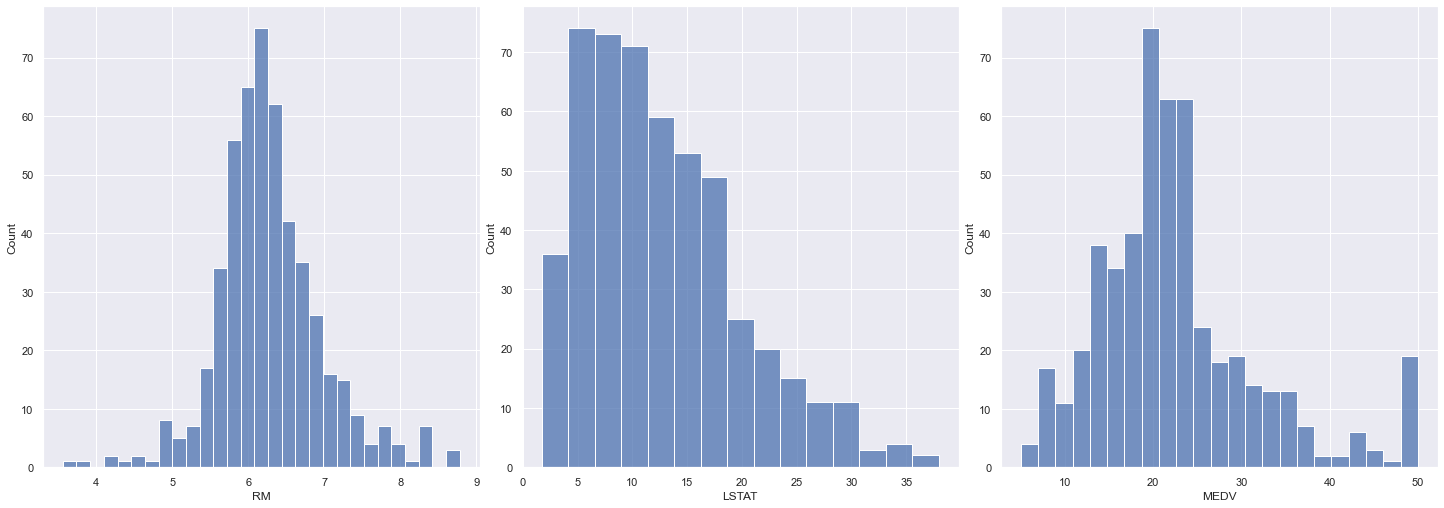

In [388]:
# Fem un histograma per veure com es distribueixen els valors del target MEDV i de les 2 variables independents amb millors
# valor de correl.lació
housign_short=housing[['RM', 'LSTAT', 'MEDV']]

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 7))
index = 0
axs = axs.flatten()
for k,v in housign_short.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



# Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [389]:
#Com que no tenim dades categòriques al dataframe no cal aplicar columnes dummies

In [417]:
# Fem un model de Regressió basat en els dos camps que ténen una correl.lació més forta amb el target, en aquest cas
# són els camps RM i LSTAT.
# El separació entre train i test ja s'ha fet en pasos anteriors i la mantenim als següents passos.
from sklearn import linear_model
from sklearn import metrics

regr = linear_model.LinearRegression()
X = np.asanyarray(df_housing_train[["RM","LSTAT"]])
y = np.asanyarray(df_housing_train["MEDV"])
regr.fit (X, y)
y_hat_train=regr.predict(X)

# Els coeficients 
coeficients = pd.DataFrame([df_housing_train[["RM","LSTAT"]].columns,regr.coef_]).T
coeficients = coeficients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeficients

,Attribute,Coefficients
0,RM,5.273505
1,LSTAT,-0.641831


In [418]:
#i un parell de metricas per evaluar la performance del model amb les dades de train
print ('Train Mean squared error(MSE): %.2f' % metrics.mean_squared_error(y_true=y, y_pred=y_hat_train))
print ('Train R2: %.2f' % metrics.r2_score(y_true=y, y_pred=y_hat_train))

Train Mean squared error(MSE): 29.59
Train R2: 0.65


In [439]:
# Fem la predicció amb les dades de test
y_hat= regr.predict(df_housing_test[["RM", "LSTAT"]])
x_test = np.asanyarray(df_housing_test[["RM", "LSTAT"]])
y_test = np.asanyarray(df_housing_test['MEDV'])
y_hat_test=regr.predict(x_test)

# MSE i R2 per evualuar la performance del model amb les dades de test 
print('Variance score: %.2f' % regr.score(x_test, y_test))
print ('Test Mean squared error(MSE): %.2f' % metrics.mean_squared_error(y_true=y_test, y_pred=y_hat_test))
print ('Test R2: %.2f' % metrics.r2_score(y_true=y_test, y_pred=y_hat_test))

Variance score: 0.61
Test Mean squared error(MSE): 32.73
Test R2: 0.61


C:\Users\rauga\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [440]:
# Estandarització de les dades amb RobustScaler
# L'estandarització la farem sobre els dataframes fets anteriorment per Train i Test
from sklearn import preprocessing

#L'ajust del model el fem amb les dades del X_train i després fem la mateixa transformació sobre el X_test
quant_scaler = preprocessing.QuantileTransformer(random_state=0)
X_train_quant = quant_scaler.fit_transform(X_train)
X_test_quant = quant_scaler.transform(X_test)

C:\Users\rauga\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  warnings.warn(


In [441]:
# Crear Polinomis
poly = preprocessing.PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [442]:
# Aplicar discretització (K-bins)
k_bin = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal').fit(X_train)
X_train_bin = k_bin.transform(X_train)
X_test_bin = k_bin.transform(X_test)

C:\Users\rauga\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\rauga\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica.

In [443]:
# Un cop fet els canvis amb quantscaler tornem a reagrupar la informació per poder-la analitzar.
arr_housing_train_quant=np.column_stack((X_train_quant, y_train))
df_housing_train_quant=pd.DataFrame(arr_housing_train_quant, columns=Titulos)

arr_housing_test_quant=np.column_stack((X_test_quant, y_test))
df_housing_test_quant=pd.DataFrame(arr_housing_test_quant, columns=Titulos)

In [444]:
df_housing_train_rob.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.50,0.24,0.50,0.06,0.50,0.50,0.50,0.50,0.53,0.50,0.50,0.52,0.50,22.75
std,0.29,0.39,0.29,0.25,0.29,0.29,0.29,0.29,0.33,0.29,0.29,0.32,0.29,9.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
25%,0.25,0.00,0.25,0.00,0.25,0.25,0.25,0.25,0.29,0.25,0.26,0.25,0.25,17.32
50%,0.50,0.00,0.50,0.00,0.50,0.50,0.50,0.50,0.52,0.50,0.51,0.50,0.50,21.40
75%,0.75,0.77,0.75,0.00,0.75,0.75,0.75,0.75,1.00,0.86,0.74,0.75,0.75,25.18
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,50.00


In [445]:
df_housing_test_rob.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,0.52,0.21,0.51,0.08,0.49,0.47,0.50,0.50,0.58,0.56,0.48,0.53,0.53,22.04
std,0.29,0.37,0.27,0.27,0.29,0.28,0.31,0.31,0.32,0.25,0.27,0.36,0.28,9.16
min,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,5.60
25%,0.31,0.00,0.31,0.00,0.23,0.24,0.25,0.22,0.29,0.39,0.24,0.20,0.32,16.75
50%,0.48,0.00,0.53,0.00,0.46,0.44,0.47,0.49,0.52,0.58,0.46,0.47,0.54,20.80
75%,0.81,0.00,0.75,0.00,0.71,0.69,0.82,0.81,1.00,0.86,0.74,1.00,0.78,24.42
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.98,1.00,1.00,50.00


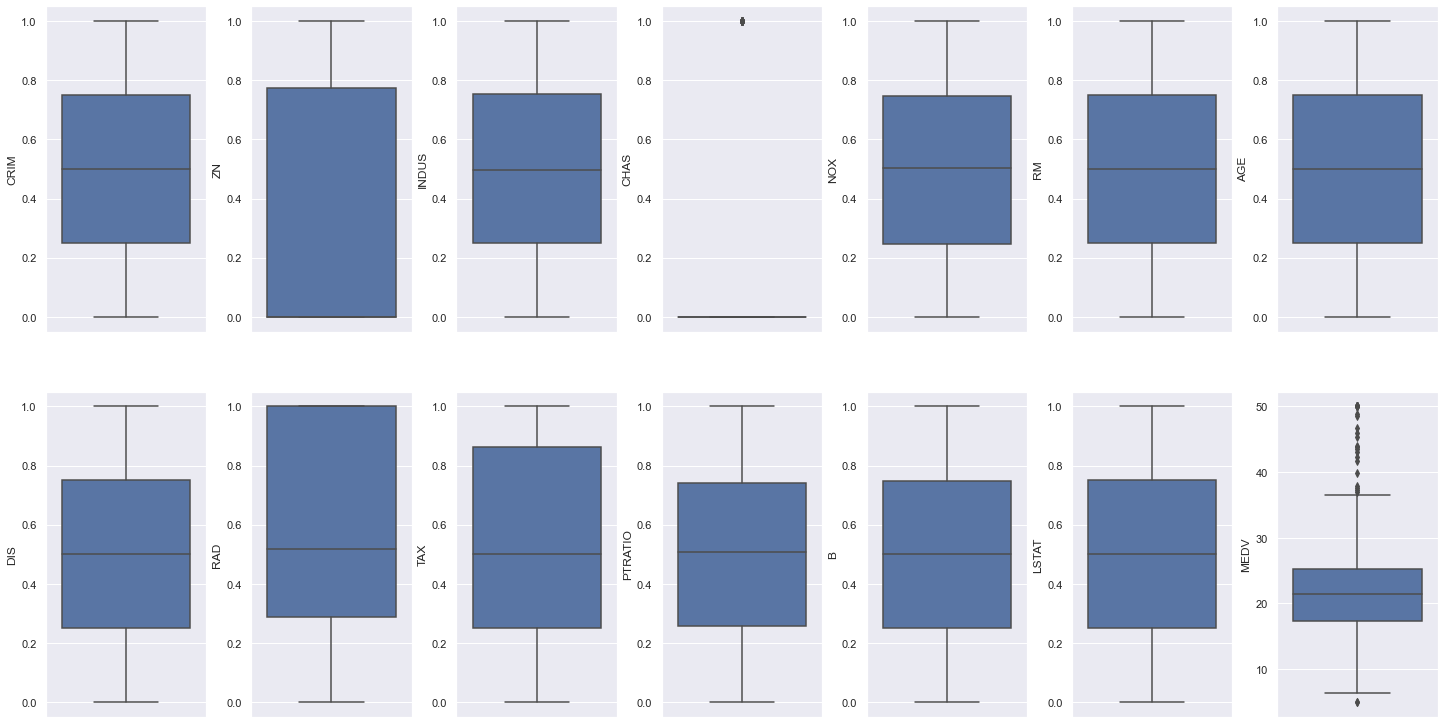

In [446]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_housing_train_quant.items():
    sns.boxplot(y=k, data=df_housing_train_quant, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [447]:
# Als boxplots podem veure que ja no tenim outliers (menys al target que no l'he transformat)

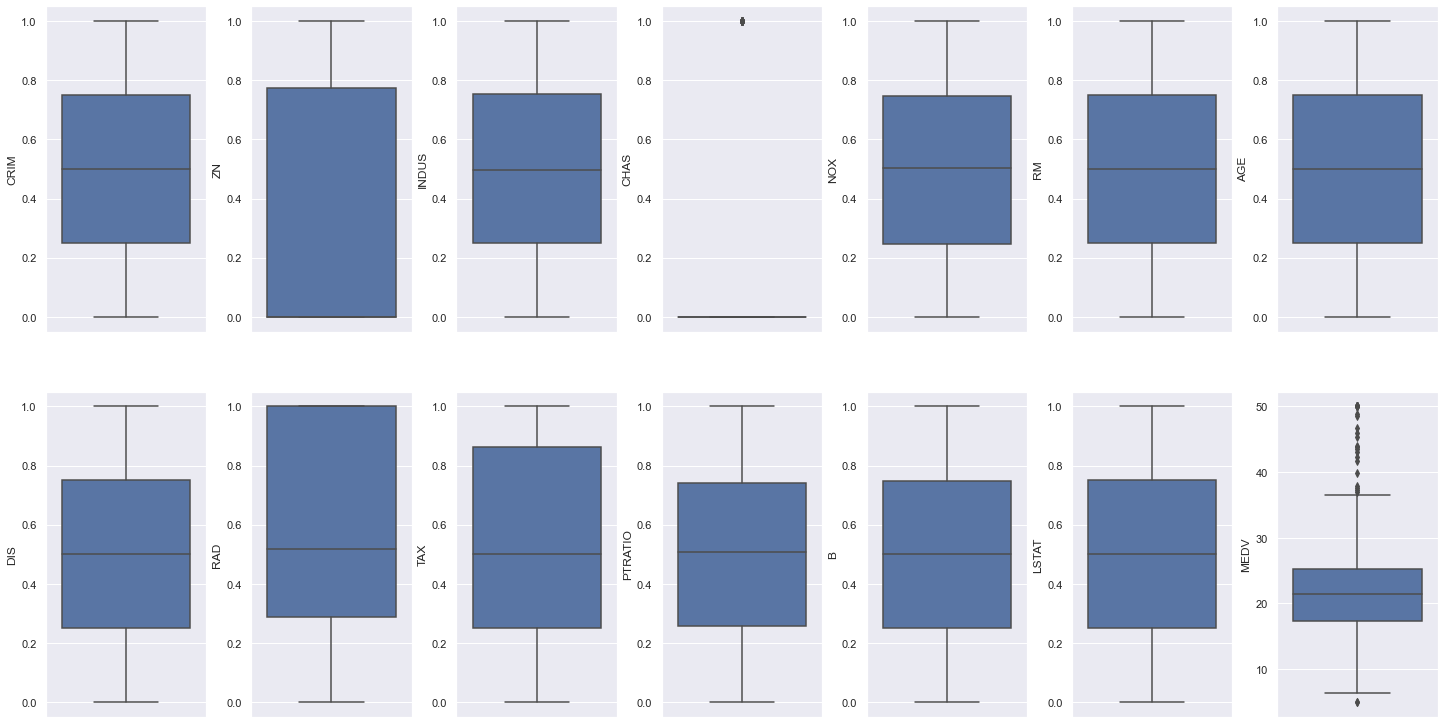

In [448]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_housing_test_quant.items():
    sns.boxplot(y=k, data=df_housing_train_quant, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [449]:
# Als boxplots podem veure que ja no tenim outliers (menys al target que està transformat)

In [450]:
# Un cop fet els canvis amb K-bim tornem a reagrupar la informació per poder-la analitzar.
arr_housing_train_bin=np.column_stack((X_train_bin, y_train))
df_housing_train_bin=pd.DataFrame(arr_housing_train_bin, columns=Titulos)

arr_housing_test_bin=np.column_stack((X_test_bin, y_test))
df_housing_test_bin=pd.DataFrame(arr_housing_test_bin, columns=Titulos)

In [451]:
df_housing_train_bin.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,354.00,354.0,354.00,354.0,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,1.00,0.0,1.05,0.0,1.02,1.00,1.00,1.00,1.20,1.05,1.11,1.00,1.00,22.75
std,0.82,0.0,0.84,0.0,0.82,0.82,0.82,0.82,0.71,0.85,0.82,0.82,0.82,9.22
min,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
25%,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,17.32
50%,1.00,0.0,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,21.40
75%,2.00,0.0,2.00,0.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,25.18
max,2.00,0.0,2.00,0.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,50.00


In [452]:
df_housing_test_bin.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,152.00,152.0,152.00,152.0,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,1.04,0.0,1.11,0.0,0.96,0.91,0.98,1.04,1.30,1.21,1.04,0.99,1.09,22.04
std,0.81,0.0,0.80,0.0,0.79,0.82,0.80,0.84,0.71,0.76,0.84,0.87,0.78,9.16
min,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.60
25%,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,16.75
50%,1.00,0.0,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,20.80
75%,2.00,0.0,2.00,0.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,24.42
max,2.00,0.0,2.00,0.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,50.00


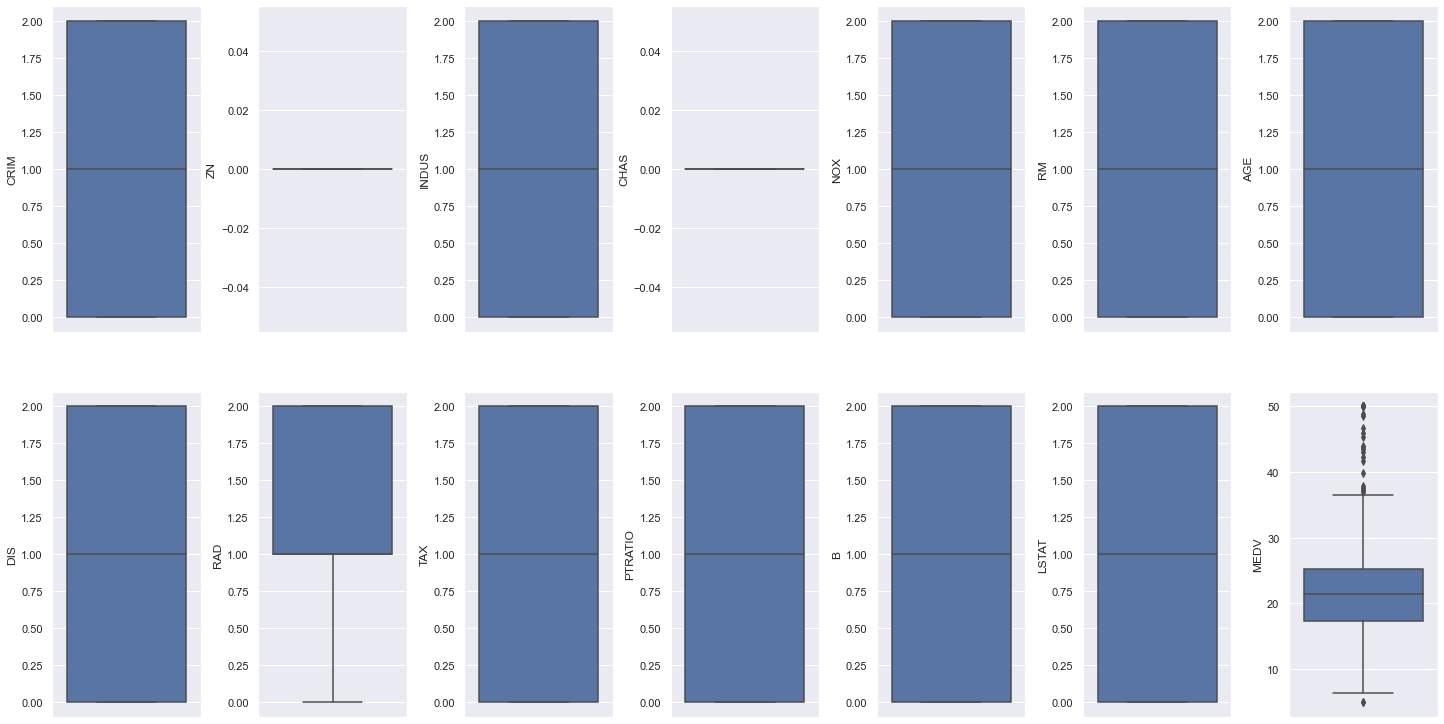

In [453]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_housing_train_rob.items():
    sns.boxplot(y=k, data=df_housing_train_bin, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Text(0.5, 1.0, 'Gràfic Residu vs Predicted MEDV_test')

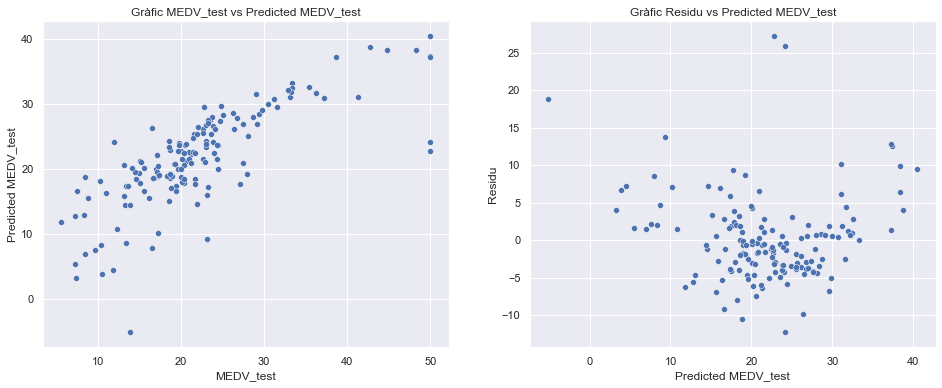

In [494]:
# Intepretacció de la regressió
residu=y_test-y_hat_test

f, axes3 = plt.subplots(1, 2, figsize=(16, 6))

ax6=sns.scatterplot(x=y_test, y=y_hat_test, ax=axes3[0])
ax6.set(xlabel='MEDV_test', ylabel='Predicted MEDV_test')
ax6.set_title("Gràfic MEDV_test vs Predicted MEDV_test")

ax7=sns.scatterplot(x=y_hat_test, y=residu, ax=axes3[1])
ax7.set(xlabel='Predicted MEDV_test', ylabel='Residu')
ax7.set_title("Gràfic Residu vs Predicted MEDV_test")

In [ ]:
# A la primera gràfica podem veure que la relació entre el valor de test és bastant constant però es devien apartir del 40
# a les dades de test del Target. També hi ha una desviació única on el valor predit és negatiu.

# A la segona gràfica podem veure que els residus es concèntren majoritariament entre 10 i -5 (al voltant del valor 0 de residu)
# encara que hi han bastants valors per sobre i per sota. 

C:\Users\rauga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


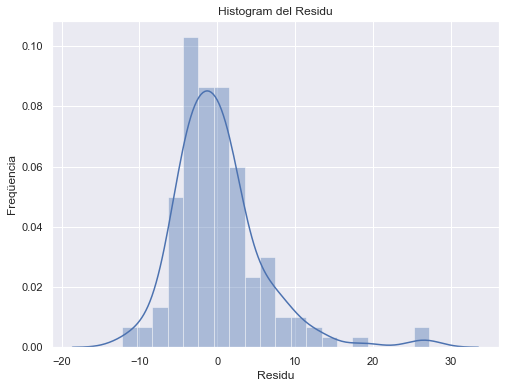

In [499]:
# Checking Normality of errors
fig, ax = plt.subplots(figsize=(8,6))

sns.distplot(residu)
plt.title("Histogram del Residu")
plt.xlabel("Residu")
plt.ylabel("Freqüencia")
plt.show()

In [ ]:
# Amb l'histograma treure conclussions semblants al gràfic anterior, però a més veiem que el residu seguiex una distribució
# nomral, a banda dels valors de residu més grans de 20.